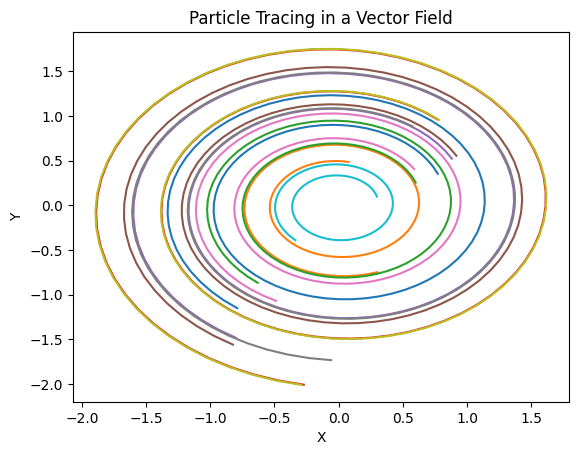

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vector field function that returns velocities at a given position
def vector_field(x, y):
    # Define your vector field equations here
    # Example: return (-y, x) for a rotating vector field
    return (-y, x)

# Initialize particle positions
num_particles = 10
initial_positions = np.random.rand(num_particles, 2)  # Random initial positions

# Parameters
time_step = 0.1
num_steps = 100

# Particle tracing loop
particle_positions = [initial_positions]
for _ in range(num_steps):
    current_positions = particle_positions[-1]
    velocities = np.array([vector_field(x, y) for x, y in current_positions])
    new_positions = current_positions + velocities * time_step
    particle_positions.append(new_positions)

# Extract x and y coordinates for plotting
x_coords = np.array([pos[:, 0] for pos in particle_positions])
y_coords = np.array([pos[:, 1] for pos in particle_positions])

# Plot the trajectories
for i in range(num_particles):
    plt.plot(x_coords[:, i], y_coords[:, i])

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Particle Tracing in a Vector Field")
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Define the grid dimensions (nx, ny)
nx = 20  # Number of grid points in the x-direction
ny = 20  # Number of grid points in the y-direction

# Create a grid of x and y coordinates
x, y = np.meshgrid(np.linspace(0, 1, nx), np.linspace(0, 1, ny))

# Define a random vector field as a numpy array with shape (nx, ny, 2)
# The shape (nx, ny, 2) represents two components: x and y components of velocity
vector_field = np.random.rand(nx, ny, 2)

# Normalize the vector field to make it smoother (optional)
vector_magnitude = np.sqrt(vector_field[:, :, 0]**2 + vector_field[:, :, 1]**2)
vector_field[:, :, 0] /= vector_magnitude
vector_field[:, :, 1] /= vector_magnitude

# Initialize particle positions
num_particles = 50
initial_positions = np.random.rand(num_particles, 2)  # Random initial positions within [0, 1]

# Parameters
time_step = 0.1
num_steps = 100

# Particle tracing loop
particle_positions = [initial_positions]
for _ in range(num_steps):
    current_positions = particle_positions[-1]

    # Interpolate vector field values at particle positions
    velocities = griddata((np.linspace(0, 1, nx), np.linspace(0, 1, ny)), vector_field.reshape(nx * ny, 2),
                          current_positions, method='linear')

    new_positions = current_positions + velocities * time_step
    particle_positions.append(new_positions)

# Extract x and y coordinates for plotting
x_coords = np.array([pos[:, 0] for pos in particle_positions])
y_coords = np.array([pos[:, 1] for pos in particle_positions])

# Plot the vector field
plt.figure(figsize=(8, 6))
plt.quiver(x, y, vector_field[:, :, 0], vector_field[:, :, 1], scale=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Vector Field")

# Plot the trajectories of particles
plt.figure(figsize=(8, 6))
for i in range(num_particles):
    plt.plot(x_coords[:, i], y_coords[:, i])

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Particle Tracing in the Vector Field")
plt.show()


ValueError: different number of values and points